In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
df_can = pd.read_csv('immigration.csv')

In [3]:
df_can = df_can.drop(['Unnamed: 0'],axis=1)

In [4]:
df_can.to_csv('immgration.csv')

In [5]:
df_can = df_can.drop(['Total'],axis=1)

In [6]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
numeric_columns = df_can.select_dtypes(include=[int]).columns
df_can['Total'] = df_can[numeric_columns].sum(axis=1)

In [8]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [9]:
df_can.to_csv('immigration.csv')

In [10]:
df_can.set_index('Country', inplace=True)

In [11]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
years = list(map(str,range(1980,2014)))

In [13]:
df_line=df_can[years]
total_immigrants=df_line.sum() #Total immigrant yearwise
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

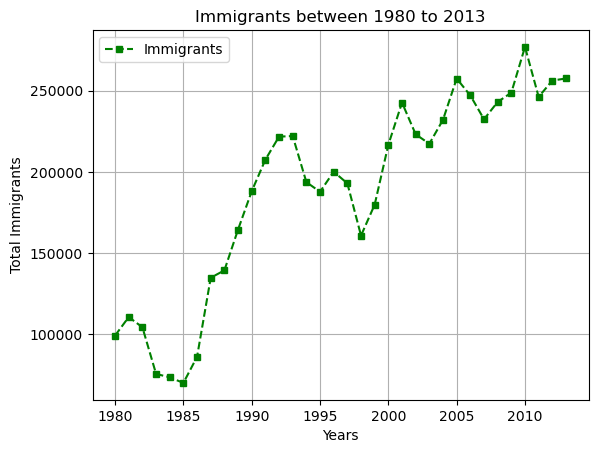

In [14]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.astype(int)

# Plot the line
ax.plot(total_immigrants,
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dashed")

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])
ax.grid('True')

#Display the plot
plt.show()

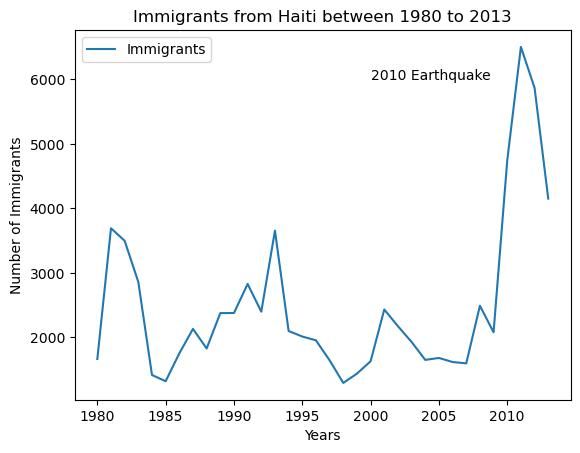

In [15]:
#Creating data for plotting
df_can.reset_index(inplace=True)
haiti=df_can[df_can['Country']=='Haiti']

    #creating haiti with only years columns from 1980 - 2013 
    #and transposing to get the result as a series
haiti=haiti[years].T
haiti
haiti.index = haiti.index.map(int)
    
    #Plotting the line plot on the data
fig, ax = plt.subplots()
ax.plot(haiti)
    #Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 
    #Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
    #Enabling Grid
    #plt.grid(True)  #or ax.grid()
    #Legend
plt.legend(["Immigrants"]) #or ax.legend()
ax.annotate('2010 Earthquake',xy=(2000, 6000))
    #Display the plot
plt.show()

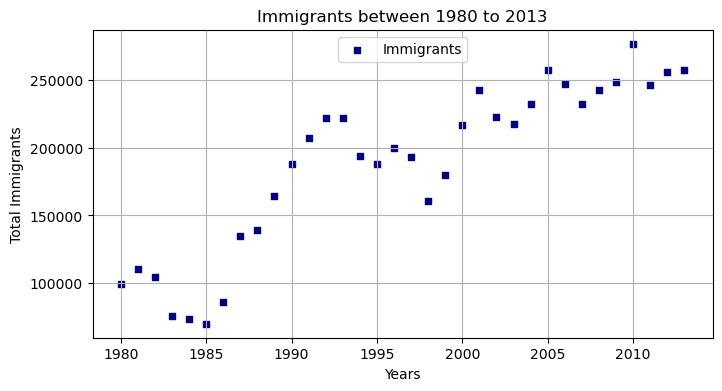

In [16]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='s', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

In [17]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_can.tail()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
149,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
123,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
109,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
131,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


 Create a bar plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.

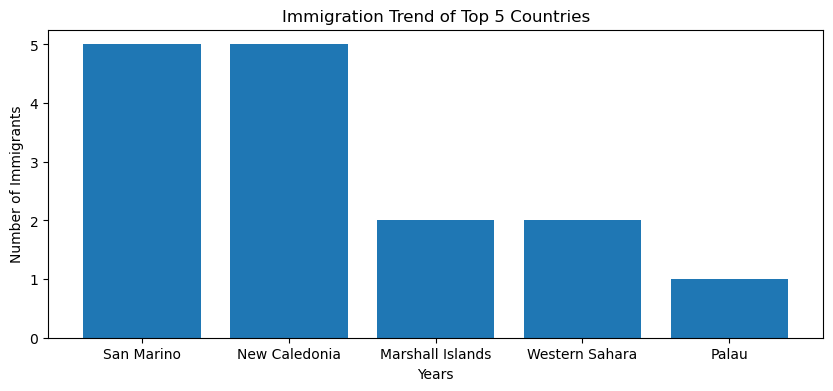

In [18]:
df_las = df_can.tail()
#df_las=df_las.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_las.Country)
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_las['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

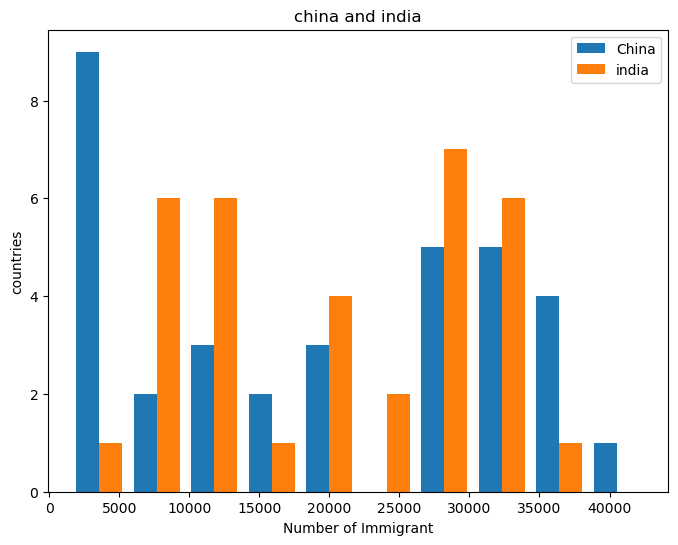

In [19]:
#df_can.set_index('Country',inplace=True)
df=df_can.groupby(['Country'])[years].sum()
df_dns=df.loc[['China', 'India'], years]
df_dns=df_dns.T

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(df_dns)
ax.set_title('china and india')
ax.set_ylabel('countries')
ax.set_xlabel('Number of Immigrant')
ax.legend(['China', 'india'])
plt.show()

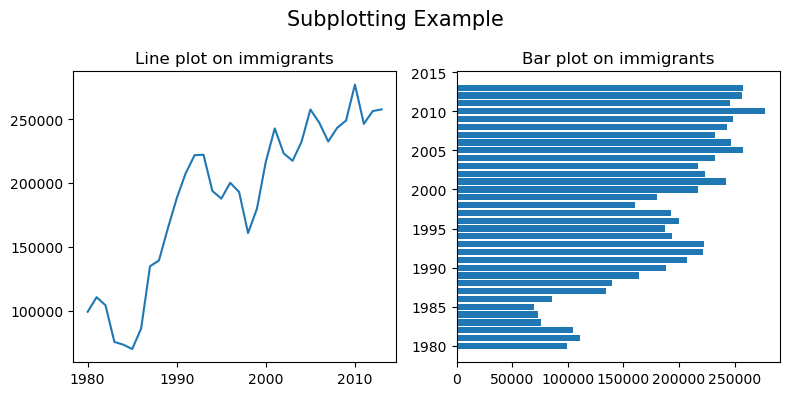

In [20]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

In [60]:
#df_can.set_index('Country', inplace=True)
nigeria = df_can.loc[['Nigeria'],years].T
nigeria.index = nigeria.index.astype(int)
pie_nigeria = nigeria['Nigeria']

Text(0.5, 1.0, 'scatter plot for Nigerian immigration')

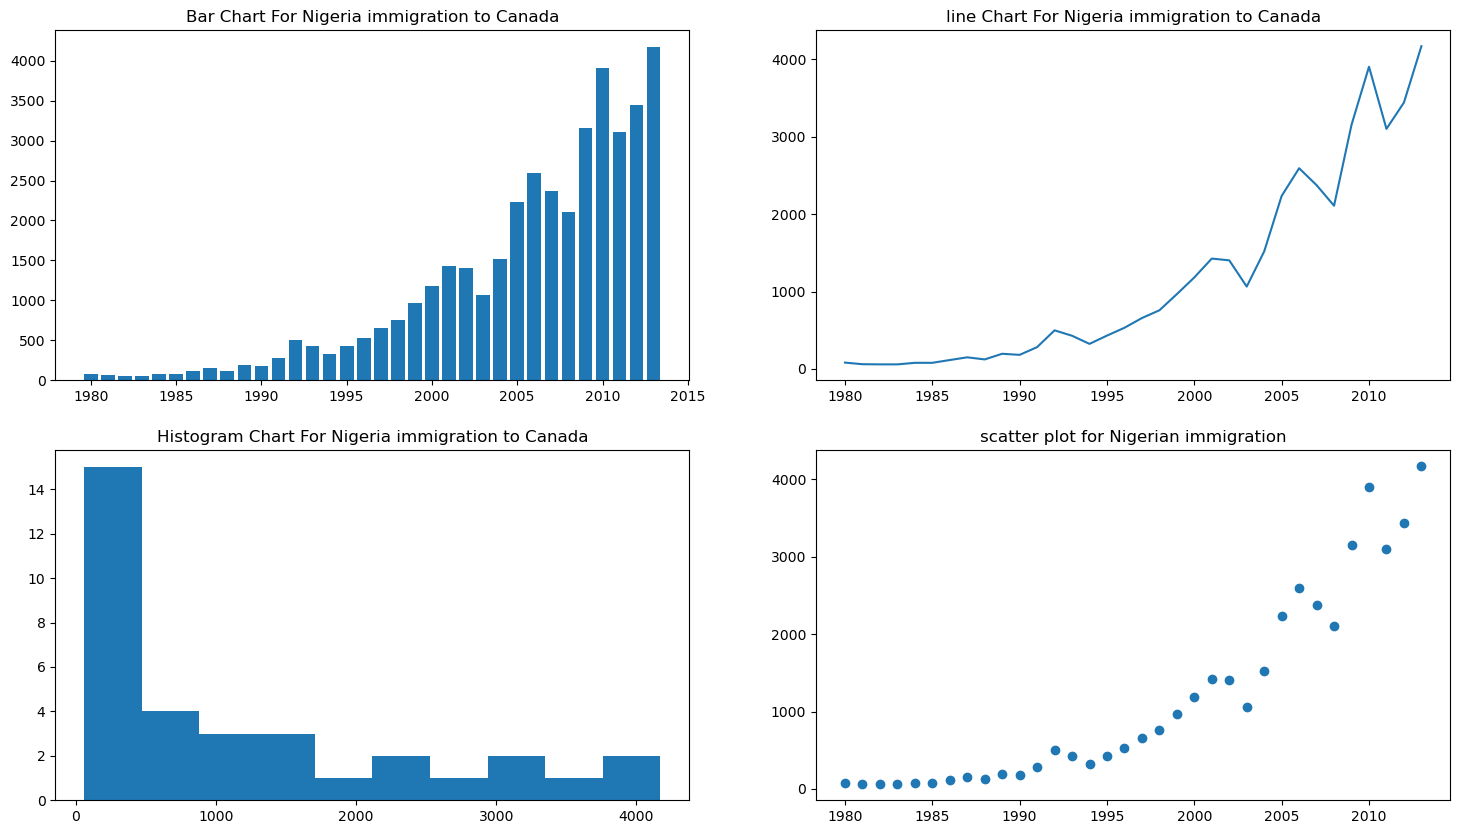

In [69]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(2,2,1)
ax1.bar(nigeria.index,nigeria['Nigeria'])
ax1.set_title('Bar Chart For Nigeria immigration to Canada')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(nigeria)
ax2.set_title('line Chart For Nigeria immigration to Canada')

ax3 = fig.add_subplot(2,2,3)
ax3.hist(nigeria)
ax3.set_title('Histogram Chart For Nigeria immigration to Canada')

ax4 = fig.add_subplot(2,2,4)
ax4.scatter(nigeria.index,nigeria['Nigeria'])
ax4.set_title('scatter plot for Nigerian immigration')